In [1]:
import pandas as pd

In [2]:
#read inflation rates data
inflation = pd.read_excel('inflation.xlsx',skiprows=11, usecols='D:E',parse_dates=['Month'])

#drop rows with null values
inflation=inflation.dropna()

#rename column
inflation=inflation.rename(columns={'Value':'InflationR','Month':'Date'})

print(inflation)

          Date  InflationR
0   2012-12-31         0.3
1   2013-01-31         0.4
2   2013-02-28         0.3
3   2013-03-31         0.1
4   2013-04-30         0.1
..         ...         ...
117 2022-09-30         0.3
118 2022-10-31         0.1
119 2022-11-30         0.2
120 2022-12-31         0.6
121 2023-01-31         0.7

[122 rows x 2 columns]


In [3]:
#convert monthly values to daily
inflation.set_index("Date",inplace=True)

daily_inflation = inflation.resample('D').ffill()

print(daily_inflation)

            InflationR
Date                  
2012-12-31         0.3
2013-01-01         0.3
2013-01-02         0.3
2013-01-03         0.3
2013-01-04         0.3
...                ...
2023-01-27         0.6
2023-01-28         0.6
2023-01-29         0.6
2023-01-30         0.6
2023-01-31         0.7

[3684 rows x 1 columns]


In [4]:
#read interest rates data
interest=pd.read_csv('^TNX.csv',header=0,usecols=[0,4],parse_dates=['Date'])

#rename column and drop null values
interest=interest.rename(columns={'Close':'InterestR'})
interest=interest.dropna()

print(interest)

           Date  InterestR
0    2013-01-02      1.839
1    2013-01-03      1.899
2    2013-01-04      1.915
4    2013-01-07      1.903
5    2013-01-08      1.871
...         ...        ...
3067 2023-01-25      3.462
3068 2023-01-26      3.493
3069 2023-01-27      3.518
3071 2023-01-30      3.551
3072 2023-01-31      3.529

[2536 rows x 2 columns]


In [5]:
#read market index data
market=pd.read_csv('SPY.csv',header=0,usecols=[0,4],parse_dates=['Date'])

#rename column and drop null values
market=market.dropna()
market=market.rename(columns={'Close':'Market_Index'})

print(market)

           Date  Market_Index
0    2013-01-02    146.059998
1    2013-01-03    145.729996
2    2013-01-04    146.369995
3    2013-01-07    145.970001
4    2013-01-08    145.550003
...         ...           ...
2533 2023-01-25    400.350006
2534 2023-01-26    404.750000
2535 2023-01-27    405.679993
2536 2023-01-30    400.589996
2537 2023-01-31    406.480011

[2538 rows x 2 columns]


In [6]:
#read PRGS daily stock prices data
prgs=pd.read_csv('PRGS.csv',usecols=[0,4],parse_dates=['Date'])

#rename column and drop null values
prgs=prgs.dropna()
prgs=prgs.rename(columns={'Close':'PRGS'})

print(prgs)

           Date       PRGS
0    2013-01-02  21.540001
1    2013-01-03  20.889999
2    2013-01-04  22.020000
3    2013-01-07  22.400000
4    2013-01-08  22.490000
...         ...        ...
2533 2023-01-25  52.459999
2534 2023-01-26  52.799999
2535 2023-01-27  52.830002
2536 2023-01-30  51.990002
2537 2023-01-31  53.040001

[2538 rows x 2 columns]


In [7]:
#read ORCL daily stock prices data
orcl=pd.read_csv('ORCL.csv',header=0,usecols=[0,4],parse_dates=['Date'])

#rename column and drop null values
orcl=orcl.dropna()
orcl=orcl.rename(columns={'Close':'ORCL'})

print(orcl)

           Date       ORCL
0    2013-01-02  34.689999
1    2013-01-03  34.310001
2    2013-01-04  34.610001
3    2013-01-07  34.430000
4    2013-01-08  34.439999
...         ...        ...
2533 2023-01-25  89.639999
2534 2023-01-26  89.830002
2535 2023-01-27  88.989998
2536 2023-01-30  87.349998
2537 2023-01-31  88.459999

[2538 rows x 2 columns]


In [25]:
#merge all dataframes into one dataframe
df = pd.merge(prgs,orcl,on='Date',how='left')
df = pd.merge(df, market, on='Date')
df=pd.merge(df,daily_inflation,on='Date')
df = pd.merge(df, interest, on='Date')

df.head(10)

,Date,PRGS,ORCL,Market_Index,InflationR,InterestR
0,2013-01-02,21.540001,34.689999,146.059998,0.3,1.839
1,2013-01-03,20.889999,34.310001,145.729996,0.3,1.899
2,2013-01-04,22.020000,34.610001,146.369995,0.3,1.915
3,2013-01-07,22.400000,34.430000,145.970001,0.3,1.903
4,2013-01-08,22.490000,34.439999,145.550003,0.3,1.871
5,2013-01-09,22.730000,34.459999,145.919998,0.3,1.852
6,2013-01-10,23.010000,34.910000,147.080002,0.3,1.894
7,2013-01-11,23.080000,34.860001,147.070007,0.3,1.875
8,2013-01-14,23.230000,34.959999,146.970001,0.3,1.857
9,2013-01-15,23.320000,34.700001,147.070007,0.3,1.831


In [9]:
#summary stats of df
df.describe()

,PRGS,ORCL,Market_Index,InflationR,InterestR
count,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000
mean,34.773734,51.776861,274.952677,0.219361,2.159226
std,9.156709,16.027252,87.228861,0.211857,0.704074
min,20.660000,29.959999,145.550003,-0.500000,0.499000
25%,25.945001,39.977500,205.267502,0.100000,1.720000
50%,34.970000,47.924999,259.794999,0.200000,2.220000
75%,42.650002,56.602499,330.717499,0.300000,2.643500
max,54.009998,103.650002,477.709991,0.800000,4.234000


In [10]:
#assign independent variables to X, and dependent variable to y
X=df[['ORCL','Market_Index','InflationR','InterestR']]
y=df[['PRGS']]

In [11]:
from sklearn.model_selection import train_test_split

#splitting dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [12]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Perform Linear Regression
reg = LinearRegression() 

In [13]:
#create summary stats of multiple linear regression
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   PRGS   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     3520.
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:25:02   Log-Likelihood:                -6828.0
No. Observations:                2536   AIC:                         1.367e+04
Df Residuals:                    2531   BIC:                         1.370e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.4879      0.354      9.855   

In [14]:
#print correlation between PRGS and ORCL
print('Cor(PRGS, ORCL): ', df['PRGS'].corr(df['ORCL']))

Cor(PRGS, ORCL):  0.8608978981248151


<AxesSubplot:>

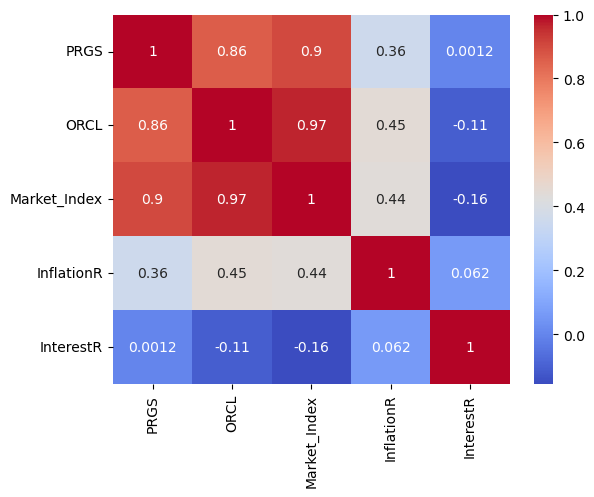

In [15]:
import seaborn as sns

#create correlation heatmap
corr = df.corr()

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='coolwarm',
            annot=True)


In [16]:
#run linear regression on training set
reg.fit(X_train, y_train) 

#print coefficients and y-intercept of training set
print("Coefficient: ",reg.coef_)
print("Intercept: ",reg.intercept_)

Coefficient:  [[-0.16511697  0.1308061  -2.87384632  2.17374318]]
Intercept:  [3.31958832]


In [17]:
import numpy as np

#predict PRGS stock prices based on independent variables in X_test (testing set)
y_pred = reg.predict(X_test)

#print RMSE between the predicted values and the actual values
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.7174857117635285


In [18]:
type(y_test)

pandas.core.frame.DataFrame

In [19]:
#extract dates from X_test to new dataframe
test_dates = df.loc[X_test.index, 'Date']

# create result dataframe to compare predicted vs actual values
results_df = pd.DataFrame({'Date': test_dates.values, 'y_test': y_test.to_numpy().flatten(), 'y_pred': y_pred.flatten()})

#create new column computing the difference between the predicted and actual values
results_df['diff'] = results_df['y_test'] - results_df['y_pred']

#sort by date ascending
results_df=results_df.sort_values('Date', ascending=True)

#show the first 10 rows (10 earliest dates)
results_df.head(10)

,Date,y_test,y_pred,diff
498,2013-01-09,22.730000,19.880502,2.849498
253,2013-01-18,23.540001,20.068856,3.471145
313,2013-01-29,24.299999,20.578199,3.721800
194,2013-02-01,23.799999,20.343504,3.456495
438,2013-02-06,23.010000,20.425022,2.584978
59,2013-02-07,23.010000,20.451070,2.558930
423,2013-02-12,23.400000,20.566296,2.833704
499,2013-02-14,23.600000,20.675414,2.924586
25,2013-02-20,23.250000,20.578635,2.671365
77,2013-03-06,23.750000,20.958597,2.791403


In [20]:
#show the last 10 rows (10 most recent dates)
results_df.tail(10)

,Date,y_test,y_pred,diff
2,2022-12-07,51.570000,48.572749,2.997251
391,2022-12-09,51.700001,48.755744,2.944257
162,2022-12-16,50.970001,47.307838,3.662163
326,2022-12-23,50.459999,47.635788,2.824211
104,2022-12-27,50.480000,47.653742,2.826258
321,2022-12-28,49.900002,47.199739,2.700263
308,2022-12-30,50.450001,47.704285,2.745716
290,2023-01-04,51.410000,45.906763,5.503237
13,2023-01-06,52.060001,45.972680,6.087321
273,2023-01-20,51.950001,46.545667,5.404334


In [21]:
#compute R2 between y_test and y_pred
r2_score(y_test, y_pred)

0.8282948999588615

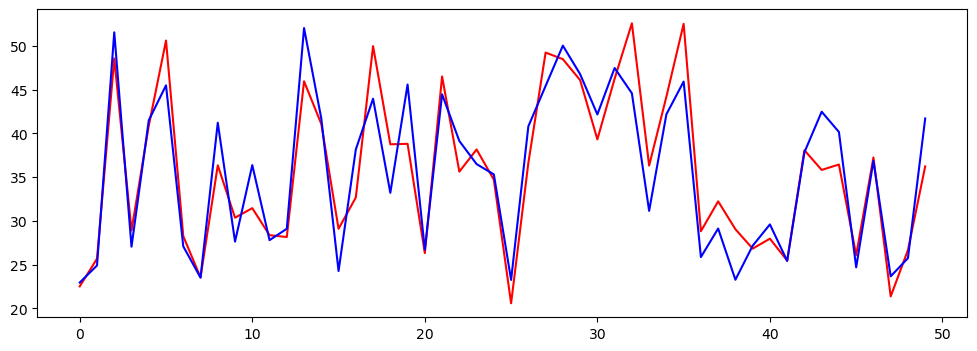

In [22]:
x = np.arange(50)

#plot the first 50 observations to compare predicted vs actual
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,4)
plt.plot(x, y_pred[:50], c = "red")
plt.plot(x, y_test[:50], c = "blue")
plt.show()

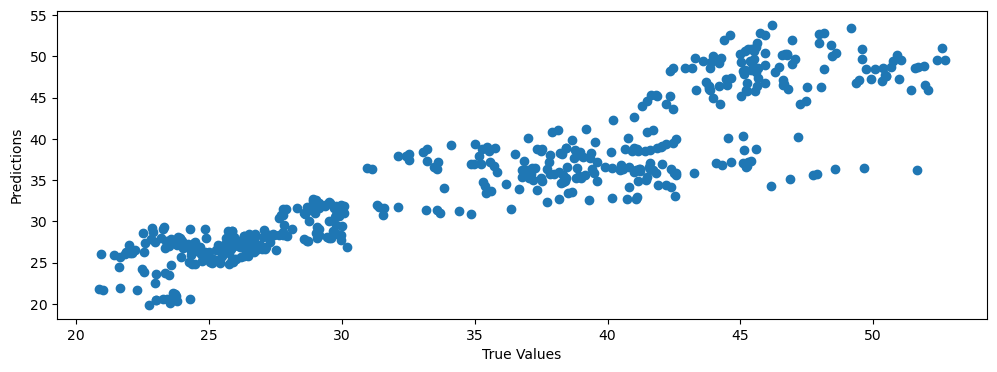

In [23]:
# Plot regression line
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()